# Enrichment Analysis

In [2]:
import pandas as pd
input_file = "/scratch/leuven/359/vsc35907/big_data_feature_extraction/patches_dirs/samples_features_means_updated.csv"
df = pd.read_csv(input_file)

In [3]:
df.head()

,filename,label,batch,group,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279,area,gene
0,clean_0_190605_6.csv,0,190605,6,0.004680,0.003580,0.005346,0.004071,0.003700,0.003822,...,0.002469,0.006853,0.005932,0.008330,0.005137,0.007786,0.054964,0.007108,517.579569,NaN
1,clean_0_181213_4.csv,0,181213,4,0.008239,0.006134,0.007640,0.006977,0.005644,0.006286,...,0.006022,0.008585,0.008980,0.009454,0.007856,0.010355,0.024081,0.008710,529.769561,NaN
2,clean_0_190531_5.csv,0,190531,5,0.003652,0.003205,0.004977,0.002953,0.003008,0.003719,...,0.001358,0.006598,0.004782,0.008488,0.004313,0.007184,0.059204,0.006139,470.877564,NaN
3,clean_1_190425_98.csv,1,190425,98,0.007931,0.006726,0.007014,0.005729,0.005405,0.005937,...,0.006717,0.007806,0.008593,0.009071,0.008033,0.009215,-0.050986,0.006979,540.172380,yghR
4,clean_0_190423_1.csv,0,190423,1,0.007629,0.006392,0.006733,0.005575,0.005297,0.005582,...,0.006200,0.007702,0.007991,0.009057,0.007849,0.009064,-0.039573,0.006921,524.914474,NaN


### Clustering K-Means

### Perform PCA

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns for PCA, excluding metadata
numeric_columns = [col for col in df.columns if col not in ['label', 'batch', 'group', 'filename', 'gene']]

# Extract features for PCA
X = df[numeric_columns].values

# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = df['label'].values
pca_df['batch'] = df['batch'].values
pca_df['group'] = df['group'].values
pca_df['gene'] = df['gene'].values
pca_df['filename'] = df['filename'].values

In [5]:
pca_df.head()

,PC1,PC2,label,batch,group,gene,filename
0,-19.871682,11.430381,0,190605,6,NaN,clean_0_190605_6.csv
1,8.832363,3.780380,0,181213,4,NaN,clean_0_181213_4.csv
2,-24.714482,20.407763,0,190531,5,NaN,clean_0_190531_5.csv
3,2.934457,-5.577440,1,190425,98,yghR,clean_1_190425_98.csv
4,0.440630,-2.230504,0,190423,1,NaN,clean_0_190423_1.csv


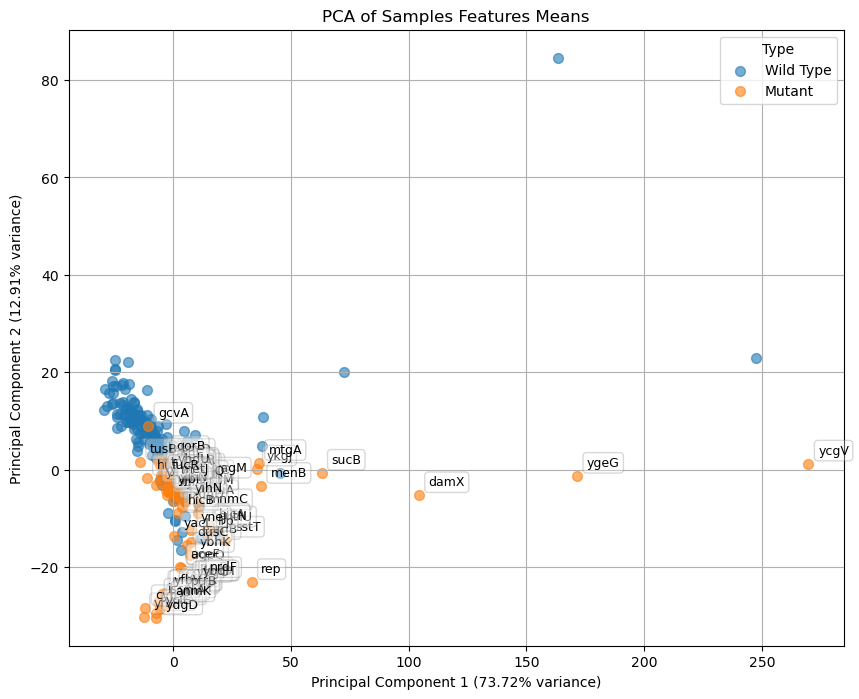

PCA plot saved to /scratch/leuven/359/vsc35907/big_data_feature_extraction/patches_dirs/pca_mean_features_plot.png


In [8]:
# Print unique gene names for mutants (for debugging)
mutant_mask = pca_df['label'] == 1
#print("Unique gene names for mutants:", pca_df[mutant_mask]['gene'].unique())

# Plot the PCA results
plt.figure(figsize=(10, 8))
unique_labels = pca_df['label'].unique()
colors = plt.colormaps.get_cmap('tab10')

# Define legend labels
label_names = {0: 'Wild Type', 1: 'Mutant'}

for label in unique_labels:
    mask = pca_df['label'] == label
    plt.scatter(
        pca_df[mask]['PC1'],
        pca_df[mask]['PC2'],
        label=label_names.get(label, f'Label {label}'),
        color=colors(label),
        alpha=0.6,
        s=50
    )

# Add gene annotations for mutants (label == 1)
for idx, row in pca_df[mutant_mask].iterrows():
    
    if pd.notna(row['gene']):
        plt.annotate(
            row['gene'],
            (row['PC1'], row['PC2']),
            xytext=(7, 7),  # Increased offset
            textcoords='offset points',
            fontsize=9,  # Smaller font
            color='black',
            bbox=dict(facecolor='white', alpha=0.3, edgecolor='gray', boxstyle='round,pad=0.3')
        )

# Add plot details
plt.title('PCA of Samples Features Means')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Type')
plt.grid(True)

# Save the plot
output_plot = '/scratch/leuven/359/vsc35907/big_data_feature_extraction/patches_dirs/pca_mean_features_plot.png'
plt.savefig(output_plot, dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

print(f"PCA plot saved to {output_plot}")

In [ ]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
# Unique labels for coloring
unique_labels = pca_df['label'].unique()
colors = plt.colormaps.get_cmap('tab10')  # Color map for labels

# Define legend labels
label_names = {0: 'Wild Type', 1: 'Mutant'}

for label in unique_labels:
    mask = pca_df['label'] == label
    plt.scatter(
        pca_df[mask]['PC1'],
        pca_df[mask]['PC2'],
        label=label_names.get(label, f'Label {label}'),
        color=colors(label),  # Use label index for color
        alpha=0.6
    )

# Add plot details
plt.title('PCA of Samples Features Means')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend(title='Type')
plt.grid(True)

# Save the plot
output_plot = '/scratch/leuven/359/vsc35907/big_data_feature_extraction/patches_dirs/pca_mean_features_plot.png'
plt.savefig(output_plot)
plt.show()
#plt.close()

print(f"PCA plot saved to {output_plot}")

## t-SNE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns for t-SNE, excluding metadata
numeric_columns = [col for col in df.columns if col not in ['label', 'batch', 'group', 'filename', 'gene']]

# Extract features for t-SNE
X = df[numeric_columns].values

# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE to reduce to 2 components
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = df['label'].values
tsne_df['batch'] = df['batch'].values
tsne_df['group'] = df['group'].values
tsne_df['gene'] = df['gene'].values
tsne_df['filename'] = df['filename'].values


In [ ]:
# Print unique gene names for mutants (for debugging)
mutant_mask = tsne_df['label'] == 1
#print("Unique gene names for mutants:", tsne_df[mutant_mask]['gene'].unique())

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
unique_labels = tsne_df['label'].unique()
colors = plt.colormaps.get_cmap('tab10')

# Define legend labels
label_names = {0: 'Wild Type', 1: 'Mutant'}

for label in unique_labels:
    mask = tsne_df['label'] == label
    plt.scatter(
        tsne_df[mask]['TSNE1'],
        tsne_df[mask]['TSNE2'],
        label=label_names.get(label, f'Label {label}'),
        color=colors(label),
        alpha=0.6,
        s=50
    )

# Add gene annotations for mutants (label == 1)
for idx, row in tsne_df[mutant_mask].iterrows():
    if pd.notna(row['gene']):
        plt.annotate(
            row['gene'],
            (row['TSNE1'], row['TSNE2']),
            xytext=(7, 7),
            textcoords='offset points',
            fontsize=7,
            color='black',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray', boxstyle='round,pad=0.3')
        )

# Add plot details
plt.title('t-SNE of Sample Feature Means')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Type')
plt.grid(True)

# Save the plot
output_plot = '/scratch/leuven/359/vsc35907/big_data_feature_extraction/patches_dirs/tsne_mean_features_plot.png'
plt.savefig(output_plot, dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

print(f"t-SNE plot saved to {output_plot}")


### UMAP

In [ ]:
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns for UMAP, excluding metadata
numeric_columns = [col for col in df.columns if col not in ['label', 'batch', 'group', 'filename', 'gene']]

# Extract features for UMAP
X = df[numeric_columns].values

# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP to reduce to 2 components
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Create a DataFrame with UMAP results
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['label'] = df['label'].values
umap_df['batch'] = df['batch'].values
umap_df['group'] = df['group'].values
umap_df['gene'] = df['gene'].values
umap_df['filename'] = df['filename'].values

In [ ]:
# Print unique gene names for mutants (for debugging)
mutant_mask = umap_df['label'] == 1
#print("Unique gene names for mutants:", umap_df[mutant_mask]['gene'].unique())

# Plot the UMAP results
plt.figure(figsize=(10, 8))
unique_labels = umap_df['label'].unique()
colors = plt.colormaps.get_cmap('tab10')

# Define legend labels
label_names = {0: 'Wild Type', 1: 'Mutant'}

for label in unique_labels:
    mask = umap_df['label'] == label
    plt.scatter(
        umap_df[mask]['UMAP1'],
        umap_df[mask]['UMAP2'],
        label=label_names.get(label, f'Label {label}'),
        color=colors(label),
        alpha=0.6,
        s=50
    )

# Add gene annotations for mutants (label == 1)
for idx, row in umap_df[mutant_mask].iterrows():
    if pd.notna(row['gene']):
        plt.annotate(
            row['gene'],
            (row['UMAP1'], row['UMAP2']),
            xytext=(7, 7),
            textcoords='offset points',
            fontsize=7,
            color='black',
            bbox=dict(facecolor='white', alpha=0.6, edgecolor='gray', boxstyle='round,pad=0.3')
        )

# Add plot details
plt.title('UMAP of Sample Feature Means')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Type')
plt.grid(True)

# Save the plot
output_plot = '/scratch/leuven/359/vsc35907/big_data_feature_extraction/patches_dirs/umap_mean_features_plot.png'
plt.savefig(output_plot, dpi=300, bbox_inches='tight')
#plt.close()
plt.show()

print(f"UMAP plot saved to {output_plot}")
